In [32]:

import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = pd.read_csv("./data/yfinance/AAPL-2023-08-22.csv")
stock_data['Date'] = stock_data['Date'].str.slice(0,10)
stock_data.head()

,Date,Open,High,Low,Close,Volume
0,2022-08-22,168.689280,168.858275,166.154315,166.581787,69026800
1,2022-08-23,166.094665,167.715057,165.667193,166.243774,54147100
2,2022-08-24,166.333254,167.118589,165.269557,166.542007,53841500
3,2022-08-25,167.784624,169.136604,167.357167,169.027252,51218200
4,2022-08-26,169.564085,170.041250,162.595416,162.655060,78961000


AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

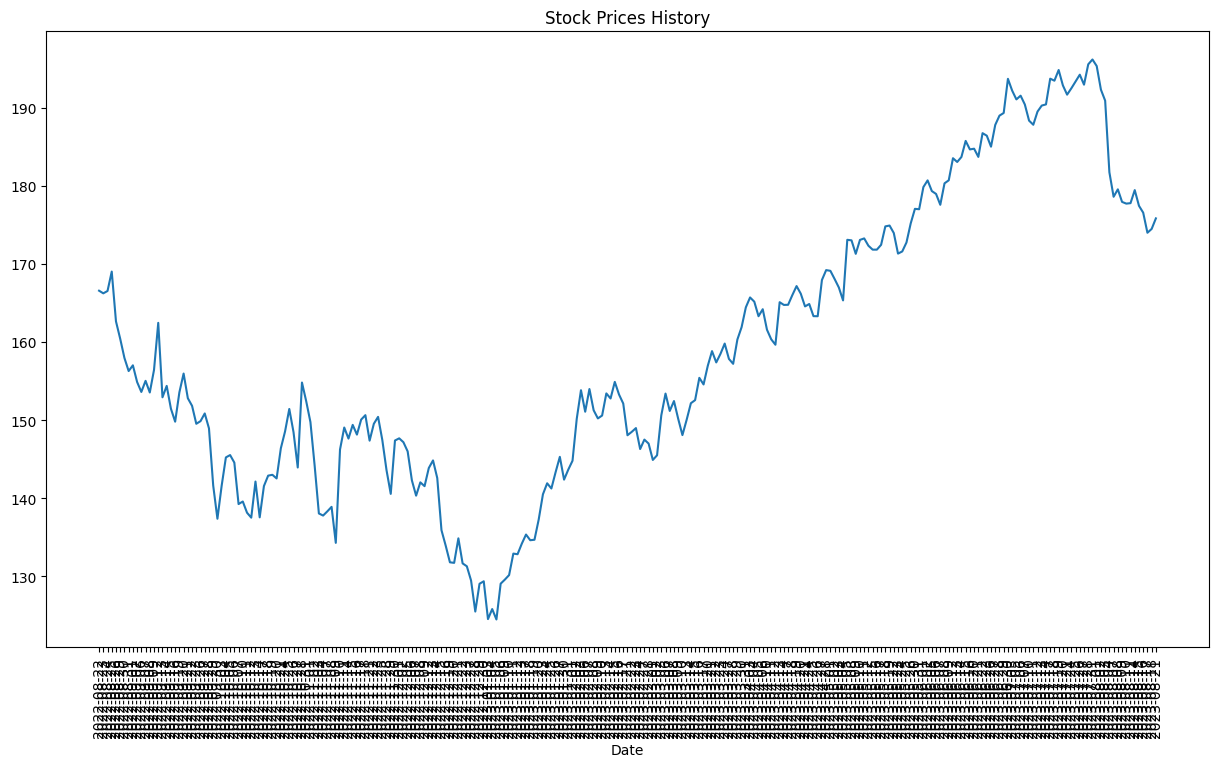

In [37]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Date'], stock_data['Close'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Prices ($)')

In [34]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))